In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kdsource as kds

In [ ]:
df1 = kds.SurfaceSourceFile("/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/ssf_N17b_C5_trf.h5").get_pandas_dataframe()
df2 = kds.SurfaceSourceFile("/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/ssf_N17b_C5.h5").get_pandas_dataframe()

def count_particles_radius(df, N):
    """
    Imprime cuántas partículas tienen radio (sqrt(x^2 + y^2))
    menor que N e igual a N, y su porcentaje sobre el total.
    """
    total = len(df)
    r = np.sqrt(df['x']**2 + df['y']**2)
    lt_count = (r < N).sum()
    eq_count = (r == N).sum()
    lt_pct = lt_count / total * 100
    eq_pct = eq_count / total * 100
    print(f"r < {N}: {lt_count} ({lt_pct:.2f}%)")
    print(f"r == {N}: {eq_count} ({eq_pct:.2f}%)")

def count_mu_stats(df):
    """
    Imprime cuántas partículas tienen mu < 0 y mu == 0,
    y su porcentaje sobre el total.
    """
    total = len(df)
    lt_count = (df['mu'] < 0).sum()
    eq_count = (df['mu'] == 0).sum()
    lt_pct = lt_count / total * 100
    eq_pct = eq_count / total * 100
    print(f"mu < 0: {lt_count} ({lt_pct:.2f}%)")
    print(f"mu == 0: {eq_count} ({eq_pct:.2f}%)")

count_particles_radius(df1, 4.5)
count_mu_stats(df1)
r = np.sqrt(df1['x']**2 + df1['y']**2)
bins = np.linspace(0, r.max(), 20)
counts, edges = np.histogram(r, bins=bins)
percent = counts / len(r) * 100
centers = edges[:-1] + np.diff(edges) / 2
# calcular el área de cada corona
areas = np.pi * (edges[1:]**2 - edges[:-1]**2)
# dividir el número de cuentas por el área de la corona
density = counts / areas
density = density / density.sum() * 100  # normalizar a porcentaje
plt.figure()
plt.plot(centers, density, marker='o')
plt.xlabel('Radio')
plt.ylim(0)
plt.ylabel('Porcentaje de partículas (%)')
plt.title('Porcentaje de partículas vs. radio')
plt.grid(True)
plt.show()

print(df1["wgt"].sum())

In [ ]:
import kdsource.histograms as kdh

trackfile = kdh.SurfaceTrackProcessor(
    "/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/ssf_N17b_C5_trf.h5",
    1e10,)

# Load binning data
columns_order = ["ln(E0/E)", "x", "y", "mu", "phi"]
micro_bins = [80] * 5
macro_bins = [8, 9, 8, 7]
binning_type = "equal_bins"
# user_defined_edges = [
#     [2.995732273553991 + 1e-9],
#     # None,
#     [-1.5, 1.5],
#     [-1.5, 1.5],
#     [1 - 1e-9],
#     None,
# ]

# Load z0 and particle type
z0 = 0
particle_type = "neutron"
trackfile.configure_binning(
    columns=columns_order,
    micro_bins=micro_bins,
    macro_bins=macro_bins,
    binning_type=binning_type,
    # user_defined_macro_edges=user_defined_edges,
)
# trackfile.plot_correlated_variables(bin_size_diagonal=100)
trackfile.load_info_for_onthefly(z0=z0, particle_type=particle_type)
trackfile.save_to_xml_on_the_fly()

In [4]:
import kdsource.surfsource as surf

surfsource = surf.SurfaceSourceFile(
    "/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/ssf_N17b_C5_trf.h5",
    Nparticles=1e10,
    domain={"w": [0, 2]}
)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/ssf_N17b_C5_trf.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib widget
plt.close()
# surfsource.plot_distribution(
#     vars=["ln(E0/E)"],
#     norm_vars=["ln(E0/E)"],
#     bins=[101],
#     scales=["linear","log"],
#     info=True,
#     errors=True,
# )

surfsource.plot_distribution(
    vars=["x", "y"],
    norm_vars=["x", "y"],
    bins=[101, 101],
    scales=["linear", "linear"],
    zscale="log",
    info=True,
    errors=True,
)

plt.show()



# Prueba 1

In [ ]:
import kdsource.histograms as kdh
import kdsource.surfsource as kds

hs = kdh.HistogramSource(
    trackfile="/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/ssf_N17b_C5_trf.h5",
    particle_type="neutron",
    z0=0,
    Nparticles=1e10,
    surface_geometry='circular',
    R=5,
    domain={"w": [0, 2]},
)

df = hs.surface_source.get_pandas_dataframe()

hs.configure_binning(
    variable_order=["ln(E0/E)", "x", "y", "mu", "phi"],
    micro_bins=[80] * 5,
    macro_bins=[8, 7, 6, 5],
    micro_binning="adaptive",
    macro_binning="adaptive",
)

hs.build_tree()

hs.write_xml(output="source.xml")

hs.generate_mcpl(
    n_particles=3e6,
    write_path="mcpl_test.mcpl",
    overwrite=True,
)


[DEBUG] Creando SurfaceSourceFile con domain={'w': [0, 2], 'type': [2112, None]}
[DEBUG] Σwgt=2.218e+04 | N=10000000000 | J=2.218e-06
[DEBUG] Binning configurado → {'order': ['ln(E0/E)', 'x', 'y', 'mu', 'phi'], 'micro': [80, 80, 80, 80, 80], 'macro': [8, 7, 6, 5], 'micro_binning': 'adaptive', 'macro_binning': 'adaptive', 'user': [None, None, None, None, None]}


Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/ssf_N17b_C5_trf.h5: 45840
100% n, 0% g, 0% e-, 0% e+, 0% p, 


[DEBUG] Árbol construido con éxito. Root=TreeNode(n_children=8)
[INFO] XML guardado → source.xml
[INFO] Ejecutando: kdtool resample -o /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/mcpl_test.mcpl -n 3000000 -m 2 /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/source.xml


KDSource resample tool
flag1
Resampling from histograms...
Header loaded successfully
Variables = 5 | z0 = 0.000 cm | J = 2.218e-06 1/s
 | Geometry = circular
Particula 100000
Particula 200000
Particula 300000
Particula 400000
Particula 500000
Particula 600000
Particula 700000
Particula 800000
Particula 900000
Particula 1000000
Particula 1100000
Particula 1200000
Particula 1300000
Particula 1400000
Particula 1500000
Particula 1600000
Particula 1700000
Particula 1800000
Particula 1900000
Particula 2000000
Particula 2100000
Particula 2200000
Particula 2300000
Particula 2400000
Particula 2500000
Particula 2600000
Particula 2700000
Particula 2800000
Particula 2900000
Particula 3000000
MCPL: Attempting to compress file mcpl_test.mcpl with gzip


[INFO] MCPL generado → /home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/mcpl_test.mcpl


MCPL: Succesfully compressed file into mcpl_test.mcpl.gz
Successfully sampled 3000000 particles.


PosixPath('/home/lucas/Documents/Proyecto_Integrador/PI/conductoN5/mcpl_test.mcpl')

Number of particles in file mcpl_test.mcpl.gz: 3000000
100% n, 0% g, 0% e-, 0% e+, 0% p, 


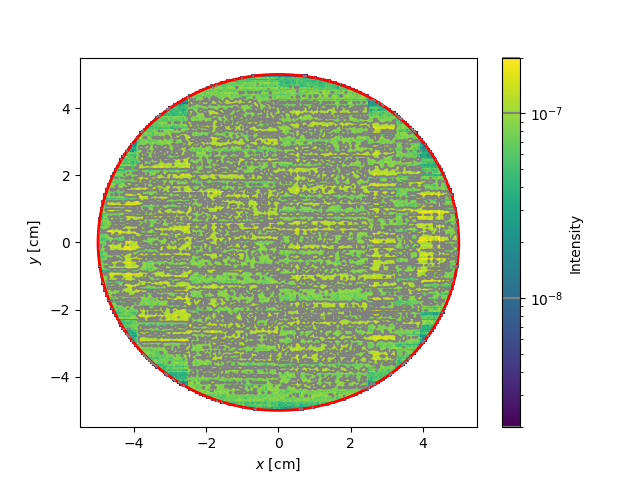

Number of particles in file ssf_N17b_C5_trf.h5: 45840
100% n, 0% g, 0% e-, 0% e+, 0% p, 


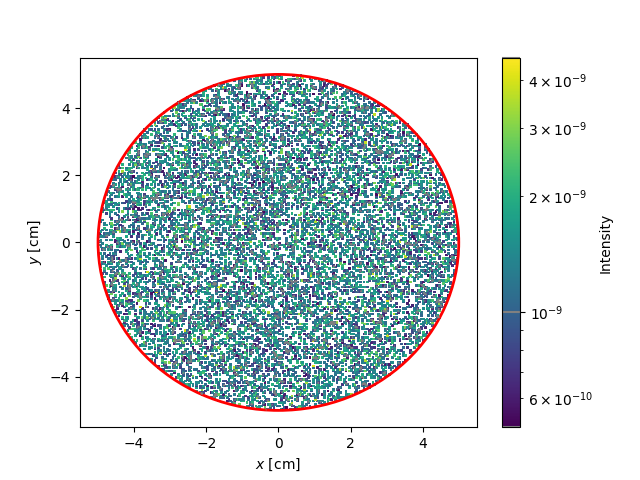

In [ ]:
import matplotlib.pyplot as plt
import kdsource.surfsource as kds
%matplotlib widget

plt.figure()
resampled = kds.SurfaceSourceFile("mcpl_test.mcpl.gz")
resampled.plot_distribution(
    vars=["x", "y"],
    bins=[201, 201],
    scales=["linear", "linear"],
    zscale="log",
)
ax = plt.gca()
circle = plt.Circle((0, 0), 5, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(circle)
plt.show()

plt.figure()
resampled = kds.SurfaceSourceFile("ssf_N17b_C5_trf.h5", domain={"w": [0, 2]})
resampled.plot_distribution(
    vars=["x", "y"],
    bins=[201, 201],
    scales=["linear", "linear"],
    zscale="log",
)
ax = plt.gca()
circle = plt.Circle((0, 0), 5, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(circle)
plt.show()

# plt.figure()
# hs.compare_with_original(
#     resampled_path="mcpl_test.mcpl.gz",
#     vars= ["ln(E0/E)"],
#     bins=[251],
#     scales=["linear", "log"],
# )
# plt.show()
# plt.figure()
# hs.compare_with_original(
#     resampled_path="mcpl_test.mcpl.gz",
#     vars=["E"],
#     bins=[251],
#     scales=["log", "log"],
# )
# plt.show()
# plt.figure()
# hs.compare_with_original(
#     resampled_path="mcpl_test.mcpl.gz",
#     vars=["y"],
#     bins=[251],
#     scales=["linear", "log"],
# )
# plt.show()
# plt.figure()
# hs.compare_with_original(
#     resampled_path="mcpl_test.mcpl.gz",
#     vars=["mu"],
#     bins=[251],
#     scales=["linear", "log"],
# )
# plt.show()
